In [1]:
#Import libraries
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats
import scipy as sp
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [2]:
df = pd.read_csv('list_working.csv',index_col=0)
nbr = pd.read_csv('final.csv',index_col=0)

In [3]:
df.shape

(5859, 55)

In [4]:
df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,room_Private room,nbrhd_Bernal Heights,nbrhd_Castro/Upper Market,nbrhd_Chinatown,nbrhd_Crocker Amazon,nbrhd_Diamond Heights,nbrhd_Downtown/Civic Center,nbrhd_Excelsior,nbrhd_Financial District,nbrhd_Glen Park,nbrhd_Golden Gate Park,nbrhd_Haight Ashbury,nbrhd_Inner Richmond,nbrhd_Inner Sunset,nbrhd_Lakeshore,nbrhd_Marina,nbrhd_Mission,nbrhd_Nob Hill,nbrhd_Noe Valley,nbrhd_North Beach,nbrhd_Ocean View,nbrhd_Outer Mission,nbrhd_Outer Richmond,nbrhd_Outer Sunset,nbrhd_Pacific Heights,nbrhd_Parkside,nbrhd_Potrero Hill,nbrhd_Presidio,nbrhd_Presidio Heights,nbrhd_Russian Hill,nbrhd_Seacliff,nbrhd_South of Market,nbrhd_Twin Peaks,nbrhd_Visitacion Valley,nbrhd_West of Twin Peaks,nbrhd_Western Addition,prop_Condominium,prop_Guest suite,prop_House
0,100,1,1.0,37.76931,-122.43386,3,1.0,1.0,2.0,170.0,2,25.0,1,217,97.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,100,1,2.0,37.75402,-122.45805,2,1.0,1.0,1.0,99.0,2,20.0,1,160,94.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,80,0,2.0,37.74511,-122.42102,5,1.0,2.0,3.0,235.0,2,0.0,30,111,98.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,86,1,10.0,37.76669,-122.45250,2,4.0,1.0,1.0,65.0,1,12.0,32,18,86.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,86,1,10.0,37.76487,-122.45183,2,4.0,1.0,1.0,65.0,1,12.0,32,8,93.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'room_Private room', 'nbrhd_Bernal Heights',
       'nbrhd_Castro/Upper Market', 'nbrhd_Chinatown', 'nbrhd_Crocker Amazon',
       'nbrhd_Diamond Heights', 'nbrhd_Downtown/Civic Center',
       'nbrhd_Excelsior', 'nbrhd_Financial District', 'nbrhd_Glen Park',
       'nbrhd_Golden Gate Park', 'nbrhd_Haight Ashbury',
       'nbrhd_Inner Richmond', 'nbrhd_Inner Sunset', 'nbrhd_Lakeshore',
       'nbrhd_Marina', 'nbrhd_Mission', 'nbrhd_Nob Hill', 'nbrhd_Noe Valley',
       'nbrhd_North Beach', 'nbrhd_Ocean View', 'nbrhd_Outer Mission',
       'nbrhd_Outer Richmond', 'nbrhd_Outer Sunset', 'nbrhd_Pacific Heights',
       'nbrhd_Parkside', 'nbrhd_Potrero Hill', 'nbrhd_Presidio',
       'nbr

## Splitting into feature and target

In [6]:
df_tgt = df.price
df_feat2 = df[['bedrooms','room_Private room','minimum_nights','latitude','number_of_reviews','bathrooms','extra_people',
 'accommodates',
 'review_scores_rating',
 'prop_Guest suite',
 'longitude',
 'beds',
 'number_of_reviews',
 'host_response_rate',
 'prop_House',
 'guests_included',
 'prop_Condominium']]
df_feat2.head()

,bedrooms,room_Private room,minimum_nights,latitude,number_of_reviews,bathrooms,extra_people,accommodates,review_scores_rating,prop_Guest suite,longitude,beds,number_of_reviews,host_response_rate,prop_House,guests_included,prop_Condominium
0,1.0,0,1,37.76931,217,1.0,25.0,3,97.0,0,-122.43386,2.0,217,100,0,2,0
1,1.0,1,1,37.75402,160,1.0,20.0,2,94.0,0,-122.45805,1.0,160,100,1,2,0
2,2.0,0,30,37.74511,111,1.0,0.0,5,98.0,0,-122.42102,3.0,111,80,0,2,0
3,1.0,1,32,37.76669,18,4.0,12.0,2,86.0,0,-122.45250,1.0,18,86,0,1,0
4,1.0,1,32,37.76487,8,4.0,12.0,2,93.0,0,-122.45183,1.0,8,86,0,1,0


In [7]:
df_tgt

0       170.0
1        99.0
2       235.0
3        65.0
4        65.0
        ...  
7108    299.0
7109    100.0
7110    250.0
7111    200.0
7113    187.0
Name: price, Length: 5859, dtype: float64

## Creating the Test and Train Set

In [8]:

X_train, X_test, y_train, y_test = train_test_split(df_feat2, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

reg = LinearRegression()
reg.fit(X_train,y_train)
df_feat_col = pd.DataFrame(data = df_feat2.columns.values, columns=['Features'])


Training set - Features:  (4687, 17) Target:  (4687,)
Training set - Features:  (1172, 17) Target:  (1172,)


In [9]:

p_values = f_regression(X_train,y_train)[1]
df_feat_col['Weights'] = reg.coef_
df_feat_col['P Values'] = p_values.round(3)
df_feat_col.sort_values(['P Values'], ascending=False)

,Features,Weights,P Values
10,longitude,291.724556,0.150
14,prop_House,11.232647,0.054
13,host_response_rate,-0.363772,0.027
0,bedrooms,43.720368,0.000
9,prop_Guest suite,-23.101975,0.000
15,guests_included,2.976042,0.000
12,number_of_reviews,-0.094928,0.000
11,beds,5.641460,0.000
8,review_scores_rating,1.279883,0.000
1,room_Private room,-84.122068,0.000


In [10]:
r2_train = reg.score(X_train, y_train)
r2_train = round(r2_train, 3)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train


0.574

In [11]:


y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

93.889

In [12]:
reg.score(X_test, y_test)
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
adjusted_r2_test


0.526

In [13]:
y_test_pred = reg.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse

94.28596060633767

Text(0, 0.5, 'Predictions')

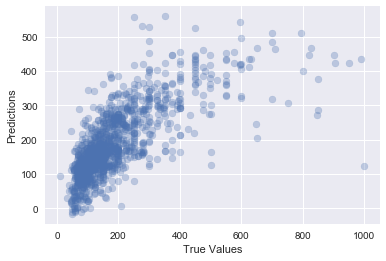

In [14]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [15]:

summary_df = pd.DataFrame(columns=['Model', 'Description','Train (RMSE)', 'R-squared (training)', 'Adjusted R-squared (training)','Test (RMSE)','R-squared (test)', 'Adjusted R-squared (test)'])
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)


In [16]:

summary_df = summary_df.append({'Model' : 'Multiple Regression-1', 'Description' : 'All Features' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df




,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889,0.576,0.574,94.285961,0.533,0.526


## Second Model- Dropping Superhost and Host Listings Count
Superhost and Host Listings Count had the highest P-Values which means we're the least confident they are not 0. We are aksi dropping the neighborhoods dummy variable.

In [17]:
df_feat = df[['bedrooms','room_Private room','minimum_nights','latitude','number_of_reviews','bathrooms',
 'accommodates',
 'review_scores_rating',
 'prop_Guest suite',
 'longitude',
 'beds',
 'number_of_reviews',
 'host_response_rate',
 'prop_House',
 'prop_Condominium']]
df_tgt = df.price

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

reg = LinearRegression()
reg.fit(X_train,y_train)
df_feat_col = pd.DataFrame(data = df_feat.columns.values, columns=['Features'])


Training set - Features:  (4687, 15) Target:  (4687,)
Training set - Features:  (1172, 15) Target:  (1172,)


In [19]:
p_values = f_regression(X_train,y_train)[1]
df_feat_col['Weights'] = reg.coef_
df_feat_col['P Values'] = p_values.round(3)
df_feat_col.sort_values(['P Values'], ascending=False)

,Features,Weights,P Values
9,longitude,287.368871,0.150
13,prop_House,12.820505,0.054
12,host_response_rate,-0.362665,0.027
0,bedrooms,46.021525,0.000
1,room_Private room,-84.045301,0.000
2,minimum_nights,-3.149205,0.000
3,latitude,1116.019210,0.000
4,number_of_reviews,-0.091415,0.000
5,bathrooms,21.627153,0.000
6,accommodates,13.107932,0.000


In [20]:
r2_train = reg.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.568

In [21]:
y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

94.644

In [22]:
reg.score(X_test, y_test)
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
adjusted_r2_test

0.521

In [23]:
y_test_pred = reg.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

94.874

Text(0, 0.5, 'Predictions')

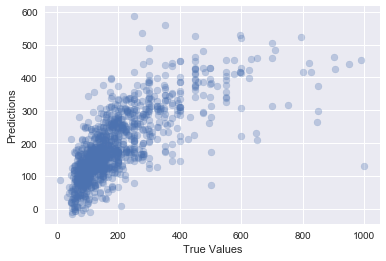

In [24]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [25]:

summary_df = summary_df.append({'Model' : 'Multiple Regression-2', 'Description' : 'Reducing Features/No Neighborhoods' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df


,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Reducing Features/No Neighborhoods,94.644,0.569,0.568,94.874000,0.527,0.521


## Next we're going to perform lasso, ridge and elastic net on our model
    
    

In [26]:
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
lr_lasso = LassoCV(alphas=params, normalize= True,cv=10)

In [27]:
lr_lasso.fit(X_train, y_train)
predict = lr_lasso.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, lr_lasso.predict(X_train)))
print(train_rmse)

94.64417824287361


In [28]:
r2_train = lr_lasso.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
print(adjusted_r2_train)

0.568


In [29]:
r2_test = lr_lasso.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(adjusted_r2_test)

0.521


In [30]:
y_test_pred = lr_lasso.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

94.874

Text(0, 0.5, 'Predictions')

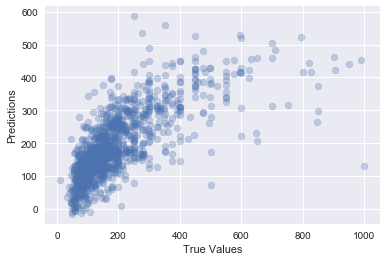

In [31]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [32]:

summary_df = summary_df.append({'Model' : 'Lasso', 'Description' : 'Reducing Features/No Neighborhoods' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df


,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Reducing Features/No Neighborhoods,94.644000,0.569,0.568,94.874000,0.527,0.521
2,Lasso,Reducing Features/No Neighborhoods,94.644178,0.569,0.568,94.874000,0.527,0.521


In [33]:
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
lr_ridge = RidgeCV(alphas = params, normalize = True,cv=10)
lr_ridge.fit(X_train, y_train)
predict = lr_ridge.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, lr_ridge.predict(X_train)))
print(train_rmse)

94.64931611051301


In [34]:
r2_train = lr_ridge.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
print(adjusted_r2_train)

0.568


In [35]:
r2_test = lr_ridge.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(adjusted_r2_test)

0.521


In [36]:
y_test_pred = lr_ridge.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

94.891

Text(0, 0.5, 'Predictions')

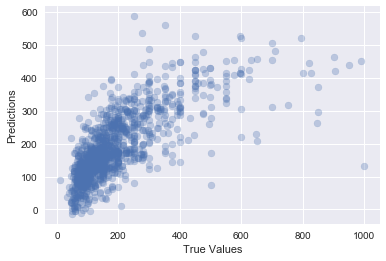

In [37]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [38]:

summary_df = summary_df.append({'Model' : 'Ridge', 'Description' : 'Reducing Features/No Neighborhoods' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df


,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Reducing Features/No Neighborhoods,94.644000,0.569,0.568,94.874000,0.527,0.521
2,Lasso,Reducing Features/No Neighborhoods,94.644178,0.569,0.568,94.874000,0.527,0.521
3,Ridge,Reducing Features/No Neighborhoods,94.649316,0.569,0.568,94.891000,0.527,0.521


In [39]:
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
l1s = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]
elastic = ElasticNetCV(alphas=params, l1_ratio = l1s,cv=10)

elastic.fit(X_train, y_train)
predict = elastic.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, elastic.predict(X_train)))
print(train_rmse)

94.64419598723936


In [40]:
r2_train = elastic.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
print(adjusted_r2_train)

0.568


In [41]:
r2_test = elastic.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(adjusted_r2_test)

0.521


In [42]:
y_test_pred = elastic.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

94.875

Text(0, 0.5, 'Predictions')

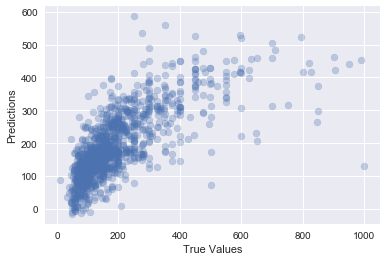

In [43]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [44]:

summary_df = summary_df.append({'Model' : 'Elastic Net', 'Description' : 'Reducing Features/No Neighborhoods' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df


,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Reducing Features/No Neighborhoods,94.644000,0.569,0.568,94.874000,0.527,0.521
2,Lasso,Reducing Features/No Neighborhoods,94.644178,0.569,0.568,94.874000,0.527,0.521
3,Ridge,Reducing Features/No Neighborhoods,94.649316,0.569,0.568,94.891000,0.527,0.521
4,Elastic Net,Reducing Features/No Neighborhoods,94.644196,0.569,0.568,94.875000,0.527,0.521


## Creating a 2nd Order Polynomial Model


In [45]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
lr_ridge = RidgeCV(params, normalize = True)
lr_ridge.fit(X_train_poly, y_train)
predict = lr_ridge.predict(X_test_poly)
train_rmse = np.sqrt(mean_squared_error(y_train, lr_ridge.predict(X_train_poly)))
print(train_rmse)

85.62980711332956


In [46]:
#reg = LinearRegression()
#reg.fit(X_train_poly,y_train)

r2_train = lr_ridge.score(X_train_poly, y_train)
n = X_train_poly.shape[0]
p = X_train_poly.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.637

In [47]:
y_train_pred = lr_ridge.predict(X_train_poly)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

85.63

In [48]:
#reg.fit(X_test_poly, y_test)
r2_test = lr_ridge.score(X_test_poly, y_test)
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]

adjusted_r2_test = (1-(1-r2_test))*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(r2_test)
print(adjusted_r2_test)
print(n)
print(p)

0.586
0.663
1172
136


In [49]:
y_test_pred = lr_ridge.predict(X_test_poly)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

88.787

In [50]:
summary_df = summary_df.append({'Model' : 'Polynomial 2nd Order', 'Description' : 'Reducing Features/No Neighborhoods' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Reducing Features/No Neighborhoods,94.644000,0.569,0.568,94.874000,0.527,0.521
2,Lasso,Reducing Features/No Neighborhoods,94.644178,0.569,0.568,94.874000,0.527,0.521
3,Ridge,Reducing Features/No Neighborhoods,94.649316,0.569,0.568,94.891000,0.527,0.521
4,Elastic Net,Reducing Features/No Neighborhoods,94.644196,0.569,0.568,94.875000,0.527,0.521
5,Polynomial 2nd Order,Reducing Features/No Neighborhoods,85.630000,0.647,0.637,88.787000,0.586,0.663


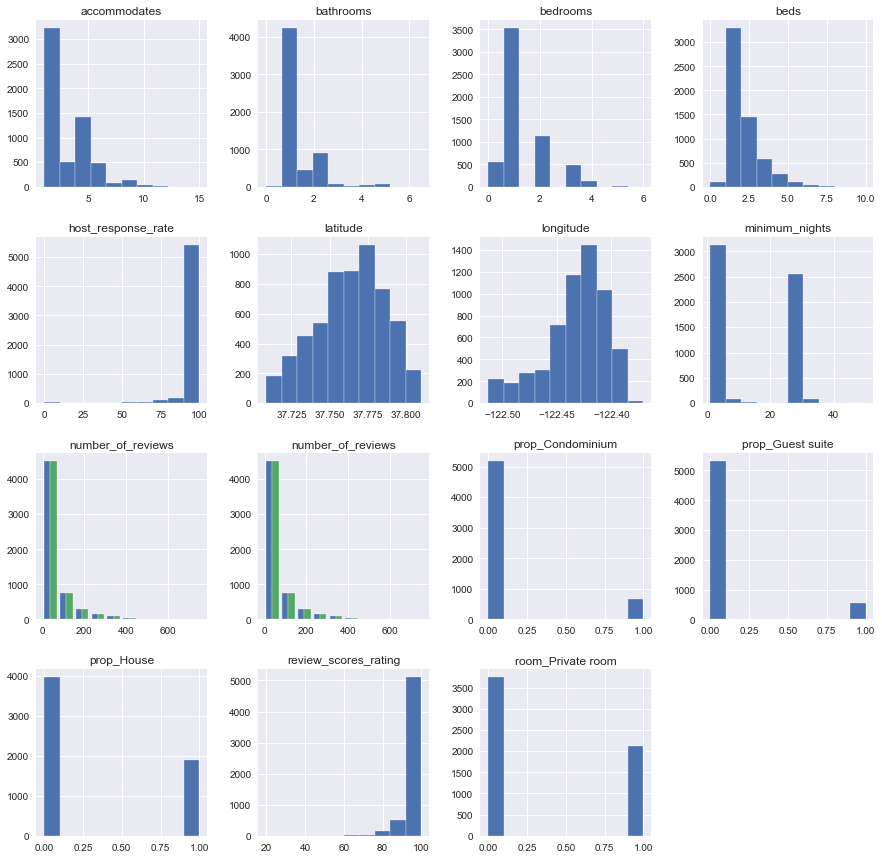

In [51]:
df_feat.hist(figsize  = [15, 15]);

## Reducing Feature Set More

In [52]:
df_feat4 = df[['bedrooms','room_Private room','minimum_nights','latitude','number_of_reviews','bathrooms',
 'accommodates',
 'review_scores_rating',
 'prop_Guest suite',
 'longitude',
 'beds',
 'number_of_reviews',
 'prop_House',
 'prop_Condominium']]
df_feat4.head()

,bedrooms,room_Private room,minimum_nights,latitude,number_of_reviews,bathrooms,accommodates,review_scores_rating,prop_Guest suite,longitude,beds,number_of_reviews,prop_House,prop_Condominium
0,1.0,0,1,37.76931,217,1.0,3,97.0,0,-122.43386,2.0,217,0,0
1,1.0,1,1,37.75402,160,1.0,2,94.0,0,-122.45805,1.0,160,1,0
2,2.0,0,30,37.74511,111,1.0,5,98.0,0,-122.42102,3.0,111,0,0
3,1.0,1,32,37.76669,18,4.0,2,86.0,0,-122.45250,1.0,18,0,0
4,1.0,1,32,37.76487,8,4.0,2,93.0,0,-122.45183,1.0,8,0,0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_feat4, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

Training set - Features:  (4687, 14) Target:  (4687,)
Training set - Features:  (1172, 14) Target:  (1172,)


In [54]:
params2 = [.001,.01,.1,1,2,10]
lr = LassoCV(alphas=params2, normalize = True,cv=10)
lr.fit(X_train_poly, y_train)
predict = lr.predict(X_test_poly)
train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train_poly)))
print(train_rmse)

88.27929278815506


In [55]:
r2_train = lr.score(X_train_poly, y_train)
n = X_train_poly.shape[0]
p = X_train_poly.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.615

In [56]:
y_train_pred = lr.predict(X_train_poly)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

88.279

In [57]:
r2_test = lr.score(X_test_poly, y_test)
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]

adjusted_r2_test = (1-(1-r2_test))*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(r2_test)
print(adjusted_r2_test)

0.562
0.626


In [58]:
y_test_pred = lr.predict(X_test_poly)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

91.349

In [59]:
summary_df = summary_df.append({'Model' : 'Polynomial 2nd Order', 'Description' : 'Reducing Features Even More' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Reducing Features/No Neighborhoods,94.644000,0.569,0.568,94.874000,0.527,0.521
2,Lasso,Reducing Features/No Neighborhoods,94.644178,0.569,0.568,94.874000,0.527,0.521
3,Ridge,Reducing Features/No Neighborhoods,94.649316,0.569,0.568,94.891000,0.527,0.521
4,Elastic Net,Reducing Features/No Neighborhoods,94.644196,0.569,0.568,94.875000,0.527,0.521
5,Polynomial 2nd Order,Reducing Features/No Neighborhoods,85.630000,0.647,0.637,88.787000,0.586,0.663
6,Polynomial 2nd Order,Reducing Features Even More,88.279000,0.625,0.615,91.349000,0.562,0.626


## Dropping host response rate as our ttest show it was not significant


In [60]:
df_feat4 = df[['host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating',
       'room_Private room','prop_Condominium', 'prop_Guest suite', 'prop_House']]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_feat4, df_tgt, random_state=13,test_size=0.2)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

Training set - Features:  (4687, 15) Target:  (4687,)
Training set - Features:  (1172, 15) Target:  (1172,)


In [62]:
params2 = [.001,.01,.1,1,2,10]
lr = LassoCV(alphas=params2, normalize = True,cv=10)
lr.fit(X_train_poly, y_train)
predict = lr.predict(X_test_poly)
train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train_poly)))
print(train_rmse)

86.92403719468946


In [63]:
r2_train = lr.score(X_train_poly, y_train)
n = X_train_poly.shape[0]
p = X_train_poly.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.626

In [64]:
y_train_pred = lr.predict(X_train_poly)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

86.924

In [65]:
r2_test = lr.score(X_test_poly, y_test)
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]

adjusted_r2_test = (1-(1-r2_test))*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(r2_test)
print(adjusted_r2_test)

0.577
0.653


In [66]:
y_test_pred = lr.predict(X_test_poly)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

89.718

In [67]:
summary_df = summary_df.append({'Model' : 'Polynomial 2nd Order', 'Description' : 'Final Features' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Reducing Features/No Neighborhoods,94.644000,0.569,0.568,94.874000,0.527,0.521
2,Lasso,Reducing Features/No Neighborhoods,94.644178,0.569,0.568,94.874000,0.527,0.521
3,Ridge,Reducing Features/No Neighborhoods,94.649316,0.569,0.568,94.891000,0.527,0.521
4,Elastic Net,Reducing Features/No Neighborhoods,94.644196,0.569,0.568,94.875000,0.527,0.521
5,Polynomial 2nd Order,Reducing Features/No Neighborhoods,85.630000,0.647,0.637,88.787000,0.586,0.663
6,Polynomial 2nd Order,Reducing Features Even More,88.279000,0.625,0.615,91.349000,0.562,0.626
7,Polynomial 2nd Order,Final Features,86.924000,0.637,0.626,89.718000,0.577,0.653


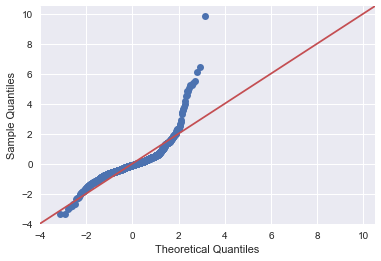

In [68]:
resid = y_test - y_test_pred
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
fig.show()

In [69]:
#dropping price outliers
print(df.price.quantile(.975))
print(df.price.quantile(.025))
df_trimmed = df[df['price']<=600]
df_trimmed = df_trimmed[df_trimmed['price']>=55]

600.0
55.0


In [70]:
df_feat4 = df_trimmed[['host_total_listings_count','latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating',
       'room_Private room','prop_Condominium', 'prop_Guest suite', 'prop_House']]
df_tgt = df_trimmed.price

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df_feat4, df_tgt, random_state=13,test_size=0.2)
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)
#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

Training set - Features:  (4464, 15) Target:  (4464,)
Training set - Features:  (1116, 15) Target:  (1116,)


In [72]:
params2 = [.001,.01,.1,1,2,10]
lr = LassoCV(alphas=params2, normalize = True,cv=10)
lr.fit(X_train_poly, y_train)
predict = lr.predict(X_test_poly)
train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train_poly)))
print(train_rmse)

65.98494441303417


In [73]:
r2_train = lr.score(X_train_poly, y_train)
n = X_train_poly.shape[0]
p = X_train_poly.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.622

In [74]:
y_train_pred = lr.predict(X_train_poly)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

65.985

In [75]:
r2_test = lr.score(X_test_poly, y_test)
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]

adjusted_r2_test = (1-(1-r2_test))*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(r2_test)
print(adjusted_r2_test)

0.617
0.703


In [76]:
y_test_pred = lr.predict(X_test_poly)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

64.37

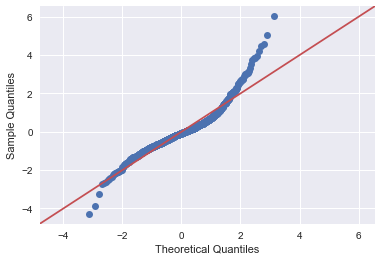

In [77]:
resid = y_test - y_test_pred
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
fig.show()

In [78]:
summary_df = summary_df.append({'Model' : 'Polynomial 2nd Order', 'Description' : 'Final Features Trimmed' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Reducing Features/No Neighborhoods,94.644000,0.569,0.568,94.874000,0.527,0.521
2,Lasso,Reducing Features/No Neighborhoods,94.644178,0.569,0.568,94.874000,0.527,0.521
3,Ridge,Reducing Features/No Neighborhoods,94.649316,0.569,0.568,94.891000,0.527,0.521
4,Elastic Net,Reducing Features/No Neighborhoods,94.644196,0.569,0.568,94.875000,0.527,0.521
5,Polynomial 2nd Order,Reducing Features/No Neighborhoods,85.630000,0.647,0.637,88.787000,0.586,0.663
6,Polynomial 2nd Order,Reducing Features Even More,88.279000,0.625,0.615,91.349000,0.562,0.626
7,Polynomial 2nd Order,Final Features,86.924000,0.637,0.626,89.718000,0.577,0.653
8,Polynomial 2nd Order,Final Features Trimmed,65.985000,0.633,0.622,64.370000,0.617,0.703


## Final Features W/ Neighborhood

In [79]:
dummies_prop = pd.get_dummies(nbr['property_type'], drop_first=True)
dummies_room= pd.get_dummies(nbr['room_type'], drop_first=True)
nbr = pd.concat([nbr, dummies_room, dummies_prop],axis=1)
nbr.drop(['property_type','room_type'],axis = 1,inplace = True)

In [80]:
df_feat_nbr =nbr[['neighbourhood_cleansed', 'accommodates', 'bathrooms', 'bedrooms',
       'guests_included', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating',
       'Private room','Condominium', 'Guest suite', 'House','instant_bookable']]
df_tgt_nbr = nbr.price

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_nbr, df_tgt_nbr, random_state=13,test_size=0.2)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

Training set - Features:  (4687, 13) Target:  (4687,)
Training set - Features:  (1172, 13) Target:  (1172,)


In [82]:
params2 = [.001,.01,.1,1,2,10]
lr = LassoCV(alphas=params2, normalize = True,cv=10)
lr.fit(X_train_poly, y_train)
predict = lr.predict(X_test_poly)
train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train_poly)))
print(train_rmse)

87.98033358019771


In [83]:
r2_train = lr.score(X_train_poly, y_train)
n = X_train_poly.shape[0]
p = X_train_poly.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.619

In [84]:
y_train_pred = lr.predict(X_train_poly)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

87.98

In [85]:
r2_test = lr.score(X_test_poly, y_test)
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]

adjusted_r2_test = (1-(1-r2_test))*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(r2_test)
print(adjusted_r2_test)

0.573
0.63


In [86]:
y_test_pred = lr.predict(X_test_poly)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

90.162

In [87]:
summary_df = summary_df.append({'Model' : 'Polynomial 2nd Order', 'Description' : 'Final Features Nbrhd' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Reducing Features/No Neighborhoods,94.644000,0.569,0.568,94.874000,0.527,0.521
2,Lasso,Reducing Features/No Neighborhoods,94.644178,0.569,0.568,94.874000,0.527,0.521
3,Ridge,Reducing Features/No Neighborhoods,94.649316,0.569,0.568,94.891000,0.527,0.521
4,Elastic Net,Reducing Features/No Neighborhoods,94.644196,0.569,0.568,94.875000,0.527,0.521
5,Polynomial 2nd Order,Reducing Features/No Neighborhoods,85.630000,0.647,0.637,88.787000,0.586,0.663
6,Polynomial 2nd Order,Reducing Features Even More,88.279000,0.625,0.615,91.349000,0.562,0.626
7,Polynomial 2nd Order,Final Features,86.924000,0.637,0.626,89.718000,0.577,0.653
8,Polynomial 2nd Order,Final Features Trimmed,65.985000,0.633,0.622,64.370000,0.617,0.703
9,Polynomial 2nd Order,Final Features Nbrhd,87.980000,0.628,0.619,90.162000,0.573,0.630


In [88]:
df_nbr_trim = nbr[nbr['price']<=600]
df_nbr_trim = df_nbr_trim[df_nbr_trim['price']>=55]
df_tgt_trim = df_nbr_trim.price
df_feat_nbr_trim =df_nbr_trim[['neighbourhood_cleansed', 'accommodates', 'bathrooms','bedrooms',
       'guests_included', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating',
       'Private room','Condominium', 'Guest suite', 'House']]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_nbr_trim, df_tgt_trim, random_state=13,test_size=0.2)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)
poly = PolynomialFeatures(2, interaction_only = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]


Training set - Features:  (4464, 12) Target:  (4464,)
Training set - Features:  (1116, 12) Target:  (1116,)


In [112]:
params2 = [.001,.01,.1,1,2,10]
lr = LassoCV(alphas=params2, normalize = True,cv=20)
lr.fit(X_train_poly, y_train)
predict = lr.predict(X_test_poly)
train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train_poly)))
print(train_rmse)
print(lr.alpha_)


68.59750667003124
0.001


In [107]:
r2_train = lr.score(X_train_poly, y_train)
n = X_train_poly.shape[0]
p = X_train_poly.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.596

In [108]:
y_train_pred = lr.predict(X_train_poly)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

68.598

In [109]:
r2_test = lr.score(X_test_poly, y_test)
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]

adjusted_r2_test = (1-(1-r2_test))*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(r2_test)
print(adjusted_r2_test)

0.595
0.64


In [110]:
y_test_pred = lr.predict(X_test_poly)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

66.206

In [111]:
summary_df = summary_df.append({'Model' : 'Polynomial 2nd Order', 'Description' : 'Final Features Nbrhd Trim' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Reducing Features/No Neighborhoods,94.644000,0.569,0.568,94.874000,0.527,0.521
2,Lasso,Reducing Features/No Neighborhoods,94.644178,0.569,0.568,94.874000,0.527,0.521
3,Ridge,Reducing Features/No Neighborhoods,94.649316,0.569,0.568,94.891000,0.527,0.521
4,Elastic Net,Reducing Features/No Neighborhoods,94.644196,0.569,0.568,94.875000,0.527,0.521
5,Polynomial 2nd Order,Reducing Features/No Neighborhoods,85.630000,0.647,0.637,88.787000,0.586,0.663
6,Polynomial 2nd Order,Reducing Features Even More,88.279000,0.625,0.615,91.349000,0.562,0.626
7,Polynomial 2nd Order,Final Features,86.924000,0.637,0.626,89.718000,0.577,0.653
8,Polynomial 2nd Order,Final Features Trimmed,65.985000,0.633,0.622,64.370000,0.617,0.703
9,Polynomial 2nd Order,Final Features Nbrhd,87.980000,0.628,0.619,90.162000,0.573,0.630


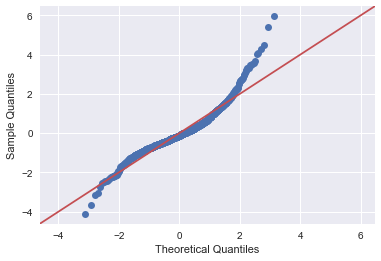

In [96]:
resid = y_test - y_test_pred
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
fig.show()